In [2]:
import pandas as pd
import numpy as np

In [189]:
df = pd.read_csv("./AEM_scores.csv")

df.columns


Index(['Image1', 'Image1 Emotion', 'Image1 Age', 'Image2', 'Image2 Emotion',
       'Age Difference', 'VGG-Face', 'OpenFace', 'Facenet', 'ArcFace',
       'VGG-Face Match', 'OpenFace Match', 'Facenet Match', 'ArcFace Match',
       'Age Group'],
      dtype='object')

In [191]:
# Calculate the combined score as the sum of the other scores
df['Combined Score'] = df[['VGG-Face', 'OpenFace', 'Facenet', 'ArcFace']].sum(axis=1)

# Assuming 'df' is your DataFrame and 'Combined Score' is the column with the scores you want to normalize
df['Norm Combined Score'] = (df['Combined Score'] - df['Combined Score'].min()) / (df['Combined Score'].max() - df['Combined Score'].min())
df['Norm Combined Score'] = 1 - df['Norm Combined Score']

In [50]:
df

,Image1,Image1 Emotion,Image1 Age,Image2,Image2 Emotion,Age Difference,VGG-Face,OpenFace,Facenet,ArcFace,VGG-Face Match,OpenFace Match,Facenet Match,ArcFace Match,Age Group,Combined Score,Norm Combined Score
0,1_MariaCallas_40_f.jpg,happy,40.0,7_MariaCallas_41_f.jpg,neutral,1.0,0.264660,0.181910,0.280351,0.356420,True,False,True,True,35-45,1.083340,0.743050
1,23_MariaCallas_41_f.jpg,happy,41.0,8_MariaCallas_33_f.jpg,fear,-8.0,0.359582,0.707231,0.447186,0.746879,True,False,False,False,35-45,2.260878,0.463758
2,10_MariaCallas_28_f.jpg,happy,28.0,17_MariaCallas_33_f.jpg,happy,5.0,0.396775,0.829574,0.541162,0.766357,True,False,False,False,25-35,2.533868,0.399010
3,18_MariaCallas_47_f.jpg,happy,47.0,21_MariaCallas_26_f.jpg,sad,-21.0,0.471650,0.752872,0.670386,0.689556,False,False,False,False,45-55,2.584464,0.387009
4,16_MariaCallas_34_f.jpg,fear,34.0,3_MariaCallas_35_f.jpg,happy,1.0,0.391038,0.279169,0.371113,0.384320,True,False,True,True,25-35,1.425639,0.661863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271843,16076_WillSmith_42_m.jpg,happy,42.0,16080_WillSmith_49_m.jpg,happy,7.0,0.199835,0.309090,0.289948,0.378664,True,False,True,True,35-45,1.177537,0.720708
271844,16078_WillSmith_45_m.jpg,happy,45.0,16079_WillSmith_45_m.jpg,happy,0.0,0.134685,0.324401,0.204904,0.290169,True,False,True,True,35-45,0.954158,0.773690
271845,16077_WillSmith_44_m.jpg,happy,44.0,16080_WillSmith_49_m.jpg,happy,5.0,0.238155,0.580095,0.286865,0.493957,True,False,True,True,35-45,1.599072,0.620727
271846,16079_WillSmith_45_m.jpg,happy,45.0,16080_WillSmith_49_m.jpg,happy,4.0,0.263863,0.338701,0.273080,0.428906,True,False,True,True,35-45,1.304549,0.690583


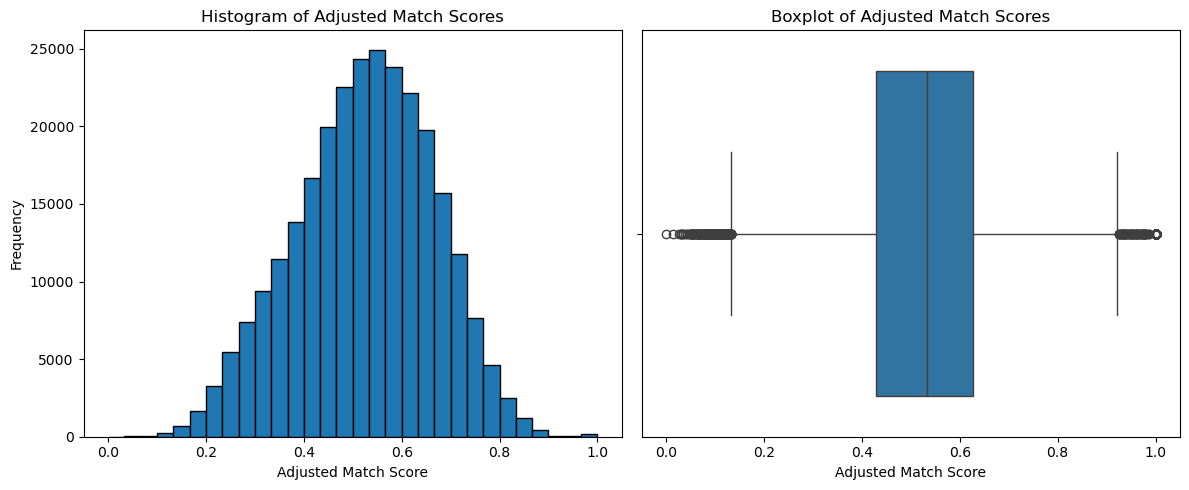

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataframe
# df = pd.read_csv('your_file.csv')  # Uncomment and modify this line to load your data

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axs[0].hist(df['Norm Combined Score'], bins=30, edgecolor='black')
axs[0].set_title('Histogram of Adjusted Match Scores')
axs[0].set_xlabel('Adjusted Match Score')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['Norm Combined Score'], ax=axs[1])
axs[1].set_title('Boxplot of Adjusted Match Scores')
axs[1].set_xlabel('Adjusted Match Score')

# Show plots
plt.tight_layout()
plt.show()


In [63]:
# Parameters for logistic function
L, k, x0 = 1, 0.1, 0  # Example values, adjust as needed
# Adjusted parameters (example values, adjust as needed)
alpha, beta, gamma, delta, epsilon, zeta, eta = 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07
# Function to calculate the adjusted match score using logistic function
def calculate_adjusted_score(d, a, S):
    x = alpha * d + beta * a + gamma * d**2 if a <= 30 else delta * d + epsilon * a + zeta * np.log(max(a, 1)) + eta * d * a
    f_da = L / (1 + np.exp(-k * (x - x0)))
    
    adjusted_score = S * f_da
    return adjusted_score
    
df['Adj_MS'] = df.apply(lambda row: calculate_adjusted_score(row['Age Difference'], row['Image1 Age'], row['Norm Combined Score']), axis=1)

# Normalizing (optional, as logistic function already bounds the values)
df['Adj_MS'] = (df['Adj_MS'] - df['Adj_MS'].min()) / (df['Adj_MS'].max() - df['Adj_MS'].min())

# Rounding off
df['Adj_MS'] = round(df['Adj_MS'], 2)

# Output
print(df[['Age Difference', 'Image1 Age', 'Norm Combined Score', 'Adj_MS']])


        Age Difference  Image1 Age  Norm Combined Score  Adj_MS
0                  1.0        40.0             0.743050    0.46
1                 -8.0        41.0             0.463758    0.05
2                  5.0        28.0             0.399010    0.21
3                -21.0        47.0             0.387009    0.00
4                  1.0        34.0             0.661863    0.40
...                ...         ...                  ...     ...
271843             7.0        42.0             0.720708    0.66
271844             0.0        45.0             0.773690    0.43
271845             5.0        44.0             0.620727    0.53
271846             4.0        45.0             0.690583    0.57
271847             4.0        45.0             0.625611    0.51

[271848 rows x 4 columns]


### Using Logatirthmic Approach

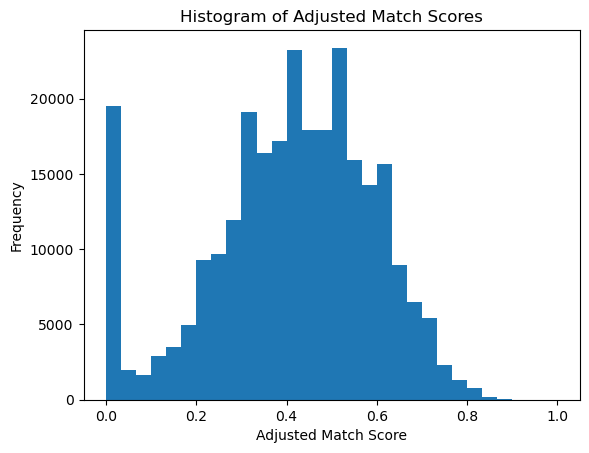

In [64]:
import matplotlib.pyplot as plt

# Histogram for adjusted match scores
df['Adj_MS'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()


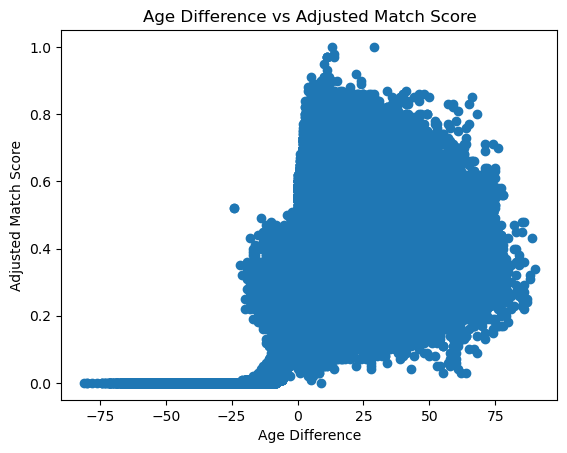

In [65]:
# Scatter plot for Age Difference vs Adjusted Match Score
plt.scatter(df['Age Difference'], df['Adj_MS'])
plt.title('Age Difference vs Adjusted Match Score')
plt.xlabel('Age Difference')
plt.ylabel('Adjusted Match Score')
plt.show()


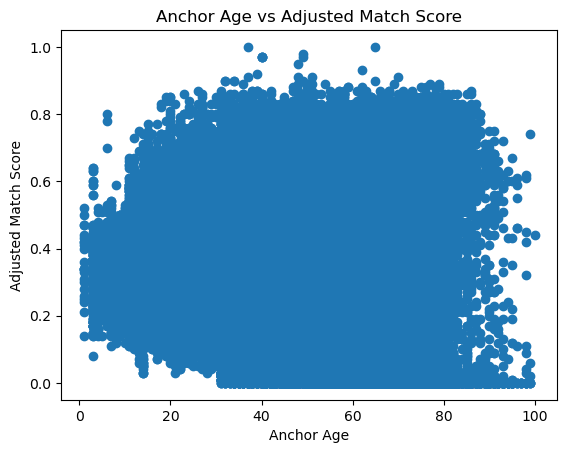

In [66]:
# Scatter plot for Anchor Age vs Adjusted Match Score
plt.scatter(df['Image1 Age'], df['Adj_MS'])
plt.title('Anchor Age vs Adjusted Match Score')
plt.xlabel('Anchor Age')
plt.ylabel('Adjusted Match Score')
plt.show()


Correlation Matrix:
                      Age Difference  Image1 Age  Norm Combined Score    Adj_MS
Age Difference             1.000000   -0.501899            -0.192317  0.476752
Image1 Age                -0.501899    1.000000             0.203610 -0.023958
Norm Combined Score       -0.192317    0.203610             1.000000  0.550136
Adj_MS                     0.476752   -0.023958             0.550136  1.000000


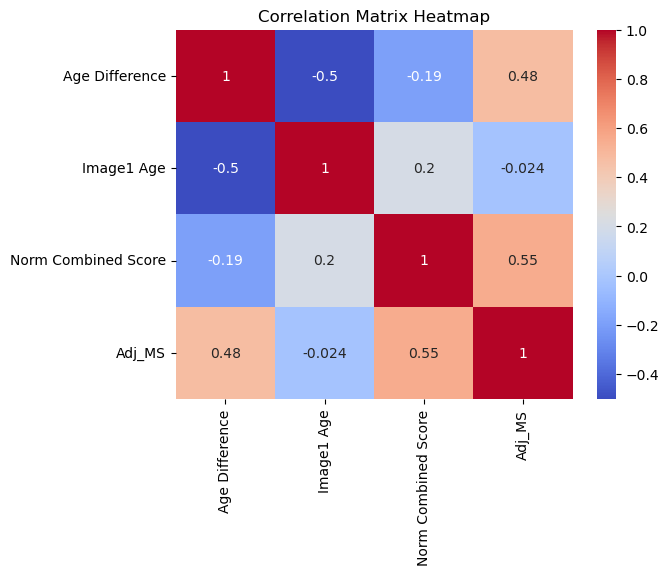

In [67]:
# Calculate correlation
correlation_matrix = df[['Age Difference', 'Image1 Age', 'Norm Combined Score', 'Adj_MS']].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Optionally, you can create a heatmap for visualizing the correlation matrix
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


### USing Polynomial approach

In [74]:
alpha, beta, gamma, delta, epsilon, zeta, eta = 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07

# Function to calculate the adjusted match score using a polynomial function
def calculate_adjusted_score(d, a, S):
    f_da = alpha * d + beta * a + gamma * d**2 if a <= 30 else delta * d + epsilon * a + zeta * a**2 + eta * d * a
    adjusted_score = S * f_da
    return adjusted_score

# Rest of the code remains the same as the previous example


In [75]:

# Read CSV file and apply the function
# df = pd.read_csv('path_to_your_csv_file.csv')
df['Adj_MS'] = df.apply(lambda row: calculate_adjusted_score(row['Age Difference'], row['Image1 Age'], row['Norm Combined Score']), axis=1)

# Normalizing (optional, as logistic function already bounds the values)
df['Adj_MS'] = (df['Adj_MS'] - df['Adj_MS'].min()) / (df['Adj_MS'].max() - df['Adj_MS'].min())

# Rounding off
df['Adj_MS'] = round(df['Adj_MS'], 2)

# Output
print(df[['Age Difference', 'Image1 Age', 'Norm Combined Score', 'Adj_MS']])

        Age Difference  Image1 Age  Norm Combined Score  Adj_MS
0                  1.0        40.0             0.743050    0.14
1                 -8.0        41.0             0.463758    0.08
2                  5.0        28.0             0.399010    0.01
3                -21.0        47.0             0.387009    0.05
4                  1.0        34.0             0.661863    0.10
...                ...         ...                  ...     ...
271843             7.0        42.0             0.720708    0.18
271844             0.0        45.0             0.773690    0.18
271845             5.0        44.0             0.620727    0.16
271846             4.0        45.0             0.690583    0.18
271847             4.0        45.0             0.625611    0.16

[271848 rows x 4 columns]


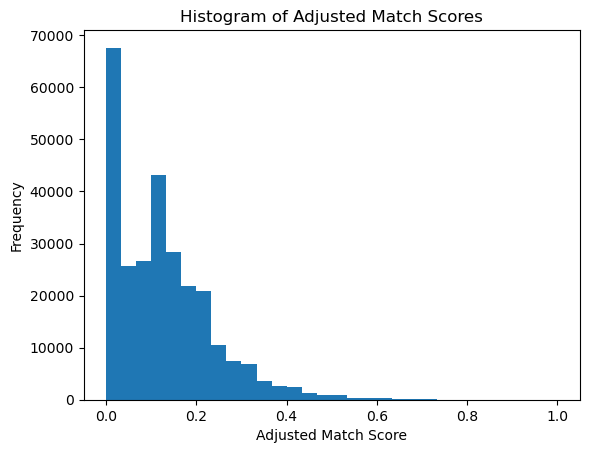

In [76]:
import matplotlib.pyplot as plt

# Histogram for adjusted match scores
df['Adj_MS'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()


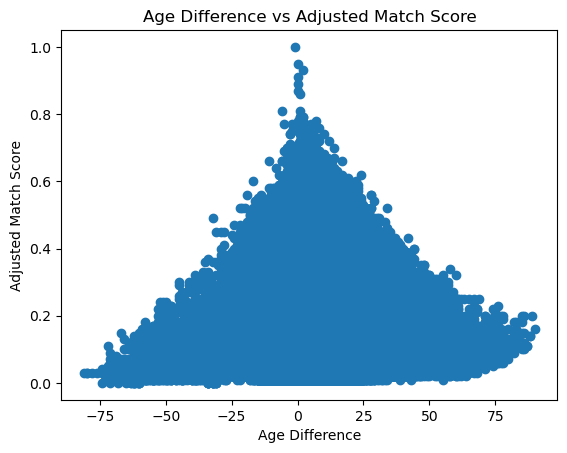

In [77]:
# Scatter plot for Age Difference vs Adjusted Match Score
plt.scatter(df['Age Difference'], df['Adj_MS'])
plt.title('Age Difference vs Adjusted Match Score')
plt.xlabel('Age Difference')
plt.ylabel('Adjusted Match Score')
plt.show()


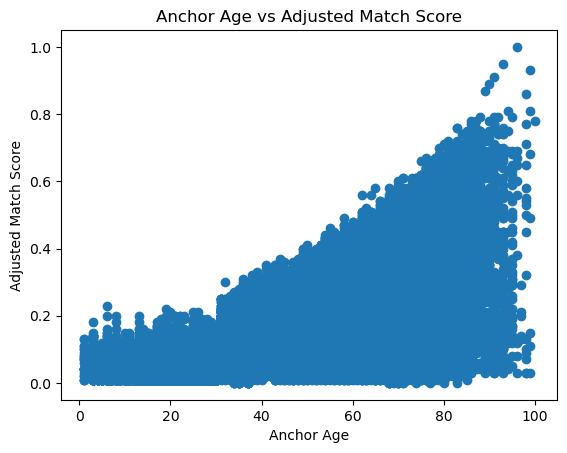

In [78]:
# Scatter plot for Anchor Age vs Adjusted Match Score
plt.scatter(df['Image1 Age'], df['Adj_MS'])
plt.title('Anchor Age vs Adjusted Match Score')
plt.xlabel('Anchor Age')
plt.ylabel('Adjusted Match Score')
plt.show()


Correlation Matrix:
                      Age Difference  Image1 Age  Norm Combined Score    Adj_MS
Age Difference             1.000000   -0.501899            -0.192317 -0.069452
Image1 Age                -0.501899    1.000000             0.203610  0.794237
Norm Combined Score       -0.192317    0.203610             1.000000  0.429118
Adj_MS                    -0.069452    0.794237             0.429118  1.000000


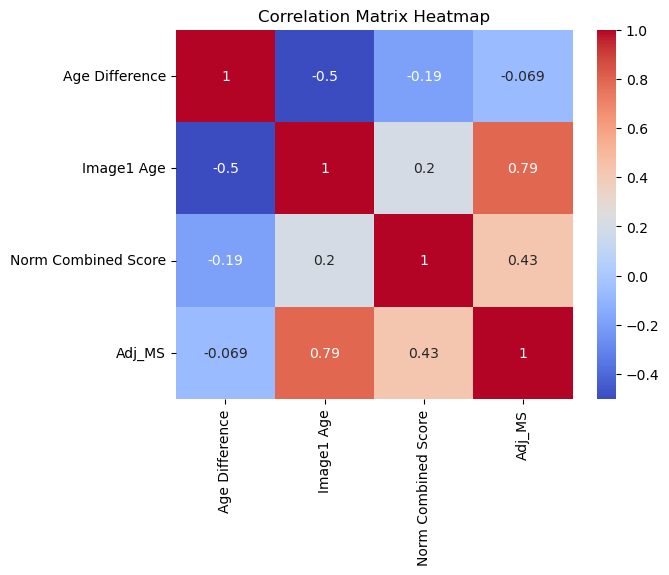

In [79]:
# Calculate correlation
correlation_matrix = df[['Age Difference', 'Image1 Age', 'Norm Combined Score', 'Adj_MS']].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Optionally, you can create a heatmap for visualizing the correlation matrix
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [81]:
import random

# Function to calculate the adjusted match score using logistic function
def calculate_adjusted_score(d, a, S, params):
    alpha, beta, gamma, delta, epsilon, zeta, eta, L, k, x0 = params
    x = alpha * d + beta * a + gamma * d**2 if a <= 30 else delta * d + epsilon * a + zeta * np.log(max(a, 1)) + eta * d * a
    f_da = L / (1 + np.exp(-k * (x - x0)))
    adjusted_score = S * f_da
    return adjusted_score

# Function to perform the iteration and calculate correlations
def test_parameters(df, params):
    df['Adj_MS'] = df.apply(lambda row: calculate_adjusted_score(row['Age Difference'], row['Image1 Age'], row['Norm Combined Score'], params), axis=1)
    df['Adj_MS'] = (df['Adj_MS'] - df['Adj_MS'].min()) / (df['Adj_MS'].max() - df['Adj_MS'].min())
    df['Adj_MS'] = round(df['Adj_MS'], 2)

    correlation_matrix = df[['Age Difference', 'Norm Combined Score', 'Adj_MS']].corr()
    return correlation_matrix

# Objective function to evaluate a parameter set
def objective(correlation_matrix):
    # Custom objective: maximize negative correlation with Age Difference and maximize correlation with Norm Combined Score
    return -correlation_matrix['Age Difference']['Adj_MS'] + correlation_matrix['Norm Combined Score']['Adj_MS']

# Function to perform random search
def random_search(df, iterations=100):
    best_score = -np.inf
    best_params = None
    best_corr_matrix = None

    for _ in range(iterations):
        # Generate random parameters within specified ranges
        params = [random.uniform(0.01, 0.1) for _ in range(10)]  # Adjust ranges as needed

        correlation_matrix = test_parameters(df, params)
        current_score = objective(correlation_matrix)

        if current_score > best_score:
            best_score = current_score
            best_params = params
            best_corr_matrix = correlation_matrix

    return best_params, best_corr_matrix

# Perform random search
best_params, best_corr_matrix = random_search(df, iterations=100)
print("Best Parameters:", best_params)
print("Best Correlation Matrix:\n", best_corr_matrix)

Best Parameters: [0.042199054268170826, 0.062498176868213594, 0.01052984514967897, 0.06505865862110799, 0.030132925816870035, 0.05466439446311252, 0.057395731904591345, 0.09304253281524537, 0.011528953501484708, 0.03274831336198815]
Best Correlation Matrix:
                      Age Difference  Norm Combined Score    Adj_MS
Age Difference             1.000000            -0.192317  0.269288
Norm Combined Score       -0.192317             1.000000  0.814522
Adj_MS                     0.269288             0.814522  1.000000


In [85]:
# df.drop('Adj_MS', axis=1, inplace=True)
df

,Image1,Image1 Emotion,Image1 Age,Image2,Image2 Emotion,Age Difference,VGG-Face,OpenFace,Facenet,ArcFace,VGG-Face Match,OpenFace Match,Facenet Match,ArcFace Match,Age Group,Combined Score,Norm Combined Score
0,1_MariaCallas_40_f.jpg,happy,40.0,7_MariaCallas_41_f.jpg,neutral,1.0,0.264660,0.181910,0.280351,0.356420,True,False,True,True,35-45,1.083340,0.743050
1,23_MariaCallas_41_f.jpg,happy,41.0,8_MariaCallas_33_f.jpg,fear,-8.0,0.359582,0.707231,0.447186,0.746879,True,False,False,False,35-45,2.260878,0.463758
2,10_MariaCallas_28_f.jpg,happy,28.0,17_MariaCallas_33_f.jpg,happy,5.0,0.396775,0.829574,0.541162,0.766357,True,False,False,False,25-35,2.533868,0.399010
3,18_MariaCallas_47_f.jpg,happy,47.0,21_MariaCallas_26_f.jpg,sad,-21.0,0.471650,0.752872,0.670386,0.689556,False,False,False,False,45-55,2.584464,0.387009
4,16_MariaCallas_34_f.jpg,fear,34.0,3_MariaCallas_35_f.jpg,happy,1.0,0.391038,0.279169,0.371113,0.384320,True,False,True,True,25-35,1.425639,0.661863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271843,16076_WillSmith_42_m.jpg,happy,42.0,16080_WillSmith_49_m.jpg,happy,7.0,0.199835,0.309090,0.289948,0.378664,True,False,True,True,35-45,1.177537,0.720708
271844,16078_WillSmith_45_m.jpg,happy,45.0,16079_WillSmith_45_m.jpg,happy,0.0,0.134685,0.324401,0.204904,0.290169,True,False,True,True,35-45,0.954158,0.773690
271845,16077_WillSmith_44_m.jpg,happy,44.0,16080_WillSmith_49_m.jpg,happy,5.0,0.238155,0.580095,0.286865,0.493957,True,False,True,True,35-45,1.599072,0.620727
271846,16079_WillSmith_45_m.jpg,happy,45.0,16080_WillSmith_49_m.jpg,happy,4.0,0.263863,0.338701,0.273080,0.428906,True,False,True,True,35-45,1.304549,0.690583


## Final Calculation of Adj Age based Match Score with Log Function approach --------------------------------

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate the adjusted match score using logistic function
def calculate_adjusted_score(d, a, S, params):
    alpha, beta, gamma, delta, epsilon, zeta, eta, L, k, x0 = params
    x = alpha * d + beta * a + gamma * d**2 if a <= 30 else delta * d + epsilon * a + zeta * np.log(max(a, 1)) + eta * d * a
    f_da = L / (1 + np.exp(-k * (x - x0)))
    adjusted_score = S * f_da
    return adjusted_score

# Load your dataframe
# df = pd.read_csv('path_to_your_csv_file.csv')

# Best parameters from your optimization
best_params = [0.042199054268170826, 0.062498176868213594, 0.01052984514967897, 0.06505865862110799, 
               0.030132925816870035, 0.05466439446311252, 0.057395731904591345, 0.09304253281524537, 
               0.011528953501484708, 0.03274831336198815]

# Apply the function with the best parameters
df['Adj_MS'] = df.apply(lambda row: calculate_adjusted_score(row['Age Difference'], row['Image1 Age'], row['Norm Combined Score'], best_params), axis=1)

# Normalize and round off (if necessary)
df['Adj_MS'] = (df['Adj_MS'] - df['Adj_MS'].min()) / (df['Adj_MS'].max() - df['Adj_MS'].min())
df['Adj_MS'] = round(df['Adj_MS'], 2)


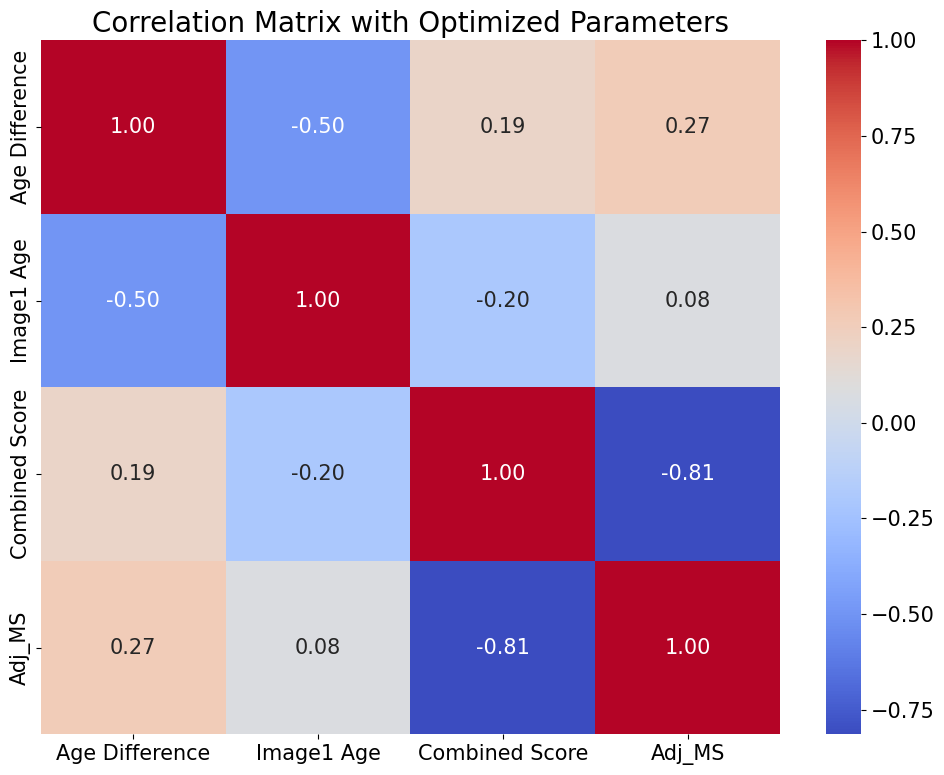

In [219]:
# Calculate the correlation matrix
correlation_matrix = df[['Age Difference', 'Image1 Age', 'Combined Score', 'Adj_MS']].corr()
# Plot the correlation matrix using a heatmap


import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

# Assuming df is your DataFrame and already defined

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Rotate labels
# plt.xticks(rotation=0, ha='right')  # Rotate x labels and align them horizontally to right
plt.yticks(rotation=90, ha='right')  # Rotate y labels

plt.title('Correlation Matrix with Optimized Parameters', fontsize=20)
plt.tight_layout()
plt.savefig('../plots/log_correlation_matrix.pdf', format='pdf')
plt.show()


In [8]:
df

,Image1,Image1 Emotion,Image1 Age,Image2,Image2 Emotion,Age Difference,VGG-Face,OpenFace,Facenet,ArcFace,VGG-Face Match,OpenFace Match,Facenet Match,ArcFace Match,Age Group,Combined Score,Norm Combined Score,Adj_MS
0,1_MariaCallas_40_f.jpg,happy,40.0,7_MariaCallas_41_f.jpg,neutral,1.0,0.264660,0.181910,0.280351,0.356420,True,False,True,True,35-45,1.083340,0.743050,0.56
1,23_MariaCallas_41_f.jpg,happy,41.0,8_MariaCallas_33_f.jpg,fear,-8.0,0.359582,0.707231,0.447186,0.746879,True,False,False,False,35-45,2.260878,0.463758,0.31
2,10_MariaCallas_28_f.jpg,happy,28.0,17_MariaCallas_33_f.jpg,happy,5.0,0.396775,0.829574,0.541162,0.766357,True,False,False,False,25-35,2.533868,0.399010,0.30
3,18_MariaCallas_47_f.jpg,happy,47.0,21_MariaCallas_26_f.jpg,sad,-21.0,0.471650,0.752872,0.670386,0.689556,False,False,False,False,45-55,2.584464,0.387009,0.20
4,16_MariaCallas_34_f.jpg,fear,34.0,3_MariaCallas_35_f.jpg,happy,1.0,0.391038,0.279169,0.371113,0.384320,True,False,True,True,25-35,1.425639,0.661863,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271843,16076_WillSmith_42_m.jpg,happy,42.0,16080_WillSmith_49_m.jpg,happy,7.0,0.199835,0.309090,0.289948,0.378664,True,False,True,True,35-45,1.177537,0.720708,0.59
271844,16078_WillSmith_45_m.jpg,happy,45.0,16079_WillSmith_45_m.jpg,happy,0.0,0.134685,0.324401,0.204904,0.290169,True,False,True,True,35-45,0.954158,0.773690,0.58
271845,16077_WillSmith_44_m.jpg,happy,44.0,16080_WillSmith_49_m.jpg,happy,5.0,0.238155,0.580095,0.286865,0.493957,True,False,True,True,35-45,1.599072,0.620727,0.50
271846,16079_WillSmith_45_m.jpg,happy,45.0,16080_WillSmith_49_m.jpg,happy,4.0,0.263863,0.338701,0.273080,0.428906,True,False,True,True,35-45,1.304549,0.690583,0.54


In [9]:
df.to_csv('agedata.csv', header=True, index=False)

In [17]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Load your DataFrame here
# df = pd.read_csv('your_file.csv')

# Get unique image names from both columns
image1_names = df['Image1'].unique()
image2_names = df['Image2'].unique()

# Create a set of unique images
Image = set(image1_names) | set(image2_names)

avg_scores = []

for image in tqdm(Image):
    # Filter rows where the image is either in 'Image1' or 'Image2'
    filtered_df = df[(df['Image1'] == image) | (df['Image2'] == image)]
    
    # Calculate the average 'Norm Combined Score' for the image
    age_score = np.mean(filtered_df['Adj_MS'])
    avg_score = np.mean(filtered_df['Norm Combined Score'])
    
    # Determine the age associated with the image when it's in 'Image1'
    image1_ages = filtered_df.loc[filtered_df['Image1'] == image, 'Image1 Age']
    # You can choose to take the average, min, max, or mode (most common) age
    image1_age = image1_ages.mode().iloc[0] if not image1_ages.empty else None
    
    # Determine emotion similarity
    emotion_similarity = filtered_df.apply(lambda row: row['Image1 Emotion'] == row['Image2 Emotion'], axis=1).astype(int)
    # You can choose to take the mean or mode (most common) value for emotion similarity
    emotion_similarity_score = round(emotion_similarity.mean(), 2)
    
    avg_scores.append({
        'Image': image,
        'MS' : round(avg_score,2),
        'Adj_MS': round(age_score, 2),
        'Emotion_Similarity': emotion_similarity_score
    })
    
avg_scores_df = pd.DataFrame(avg_scores)


100%|██████████| 16487/16487 [2:05:06<00:00,  2.20it/s]     


In [18]:
avg_scores_df

,Image,MS,Adj_MS,Emotion_Similarity
0,8940_ErnestBorgnine_88_m.jpg,0.57,0.59,0.50
1,14212_GeraldinePage_60_f.jpg,0.53,0.44,0.26
2,9169_PeterSellers_33_m.jpg,0.59,0.43,0.36
3,8902_ChristopherEccleston_46_m.jpg,0.50,0.40,0.58
4,1600_AlCorley_29_m.jpg,0.44,0.33,0.12
...,...,...,...,...
16482,15139_CatherineSchell_66_f.jpg,0.47,0.42,0.17
16483,13327_AvaGardner_34_f.jpg,0.52,0.40,0.52
16484,1685_BobDylan_71_m.jpg,0.46,0.43,0.50
16485,13932_BettyGrable_36_f.jpg,0.39,0.30,0.60


In [20]:
avg_scores_df['label'] = 1

avg_scores_df['label'] = avg_scores_df['MS'].apply(lambda x: 1 if x > 0.5 else 0)
    
avg_scores_df['label'] = avg_scores_df['label'].astype(int)
avg_scores_df.label.value_counts().to_dict()

{1: 10850, 0: 5637}

In [21]:
avg_scores_df

,Image,MS,Adj_MS,Emotion_Similarity,label
0,8940_ErnestBorgnine_88_m.jpg,0.57,0.59,0.50,1
1,14212_GeraldinePage_60_f.jpg,0.53,0.44,0.26,1
2,9169_PeterSellers_33_m.jpg,0.59,0.43,0.36,1
3,8902_ChristopherEccleston_46_m.jpg,0.50,0.40,0.58,0
4,1600_AlCorley_29_m.jpg,0.44,0.33,0.12,0
...,...,...,...,...,...
16482,15139_CatherineSchell_66_f.jpg,0.47,0.42,0.17,0
16483,13327_AvaGardner_34_f.jpg,0.52,0.40,0.52,1
16484,1685_BobDylan_71_m.jpg,0.46,0.43,0.50,0
16485,13932_BettyGrable_36_f.jpg,0.39,0.30,0.60,0


In [22]:
avg_scores_df.to_csv('data1.csv', header=True, index=False)

In [13]:
adf = pd.read_csv('data1.csv')
adf

,Image,MS,Adj_MS,Emotion_Similarity,label
0,8940_ErnestBorgnine_88_m.jpg,0.57,0.59,0.50,1
1,14212_GeraldinePage_60_f.jpg,0.53,0.44,0.26,1
2,9169_PeterSellers_33_m.jpg,0.59,0.43,0.36,1
3,8902_ChristopherEccleston_46_m.jpg,0.50,0.40,0.58,0
4,1600_AlCorley_29_m.jpg,0.44,0.33,0.12,0
...,...,...,...,...,...
16482,15139_CatherineSchell_66_f.jpg,0.47,0.42,0.17,0
16483,13327_AvaGardner_34_f.jpg,0.52,0.40,0.52,1
16484,1685_BobDylan_71_m.jpg,0.46,0.43,0.50,0
16485,13932_BettyGrable_36_f.jpg,0.39,0.30,0.60,0


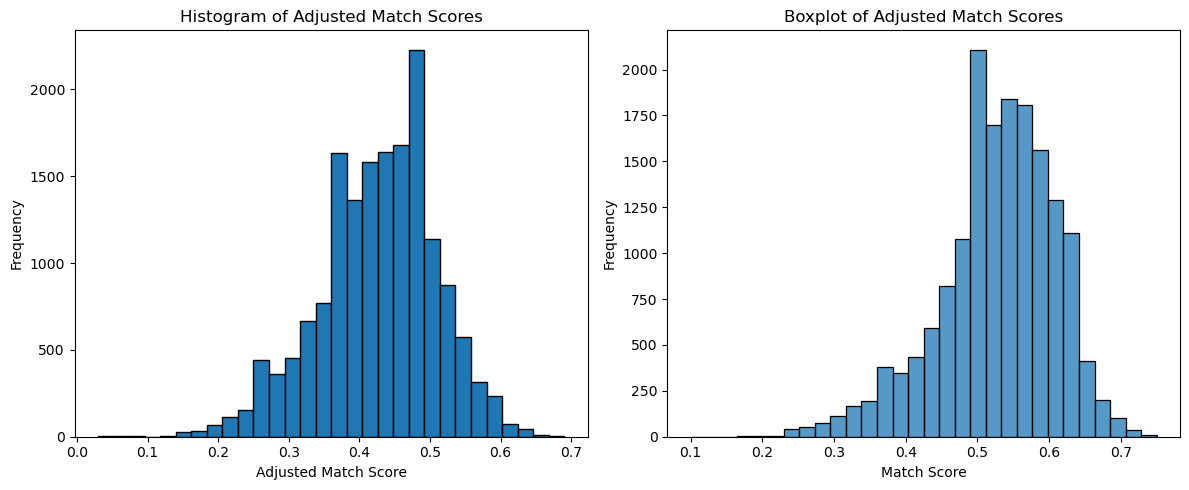

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataframe
# df = pd.read_csv('your_file.csv')  # Uncomment and modify this line to load your data

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axs[0].hist(adf['Adj_MS'], bins=30, edgecolor='black')
axs[0].set_title('Histogram of Adjusted Match Scores')
axs[0].set_xlabel('Adjusted Match Score')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.histplot(adf['MS'], bins=30, edgecolor='black', ax=axs[1])  # Use sns.histplot for seaborn
axs[1].set_title('Boxplot of Adjusted Match Scores')
axs[1].set_xlabel('Match Score')
axs[1].set_ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

train,test =train_test_split(adf,test_size=0.2,random_state=42)

train.to_csv('./train.csv',index=False)
test.to_csv('./test.csv',index=False)

In [16]:
import pandas as pd

df = pd.read_csv('./AEM_scores.csv')

In [17]:
df

,Image1,Image1 Emotion,Image1 Age,Image2,Image2 Emotion,Age Difference,VGG-Face,OpenFace,Facenet,ArcFace,VGG-Face Match,OpenFace Match,Facenet Match,ArcFace Match,Age Group
0,1_MariaCallas_40_f.jpg,happy,40.0,7_MariaCallas_41_f.jpg,neutral,1.0,0.264660,0.181910,0.280351,0.356420,True,False,True,True,35-45
1,23_MariaCallas_41_f.jpg,happy,41.0,8_MariaCallas_33_f.jpg,fear,-8.0,0.359582,0.707231,0.447186,0.746879,True,False,False,False,35-45
2,10_MariaCallas_28_f.jpg,happy,28.0,17_MariaCallas_33_f.jpg,happy,5.0,0.396775,0.829574,0.541162,0.766357,True,False,False,False,25-35
3,18_MariaCallas_47_f.jpg,happy,47.0,21_MariaCallas_26_f.jpg,sad,-21.0,0.471650,0.752872,0.670386,0.689556,False,False,False,False,45-55
4,16_MariaCallas_34_f.jpg,fear,34.0,3_MariaCallas_35_f.jpg,happy,1.0,0.391038,0.279169,0.371113,0.384320,True,False,True,True,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271843,16076_WillSmith_42_m.jpg,happy,42.0,16080_WillSmith_49_m.jpg,happy,7.0,0.199835,0.309090,0.289948,0.378664,True,False,True,True,35-45
271844,16078_WillSmith_45_m.jpg,happy,45.0,16079_WillSmith_45_m.jpg,happy,0.0,0.134685,0.324401,0.204904,0.290169,True,False,True,True,35-45
271845,16077_WillSmith_44_m.jpg,happy,44.0,16080_WillSmith_49_m.jpg,happy,5.0,0.238155,0.580095,0.286865,0.493957,True,False,True,True,35-45
271846,16079_WillSmith_45_m.jpg,happy,45.0,16080_WillSmith_49_m.jpg,happy,4.0,0.263863,0.338701,0.273080,0.428906,True,False,True,True,35-45


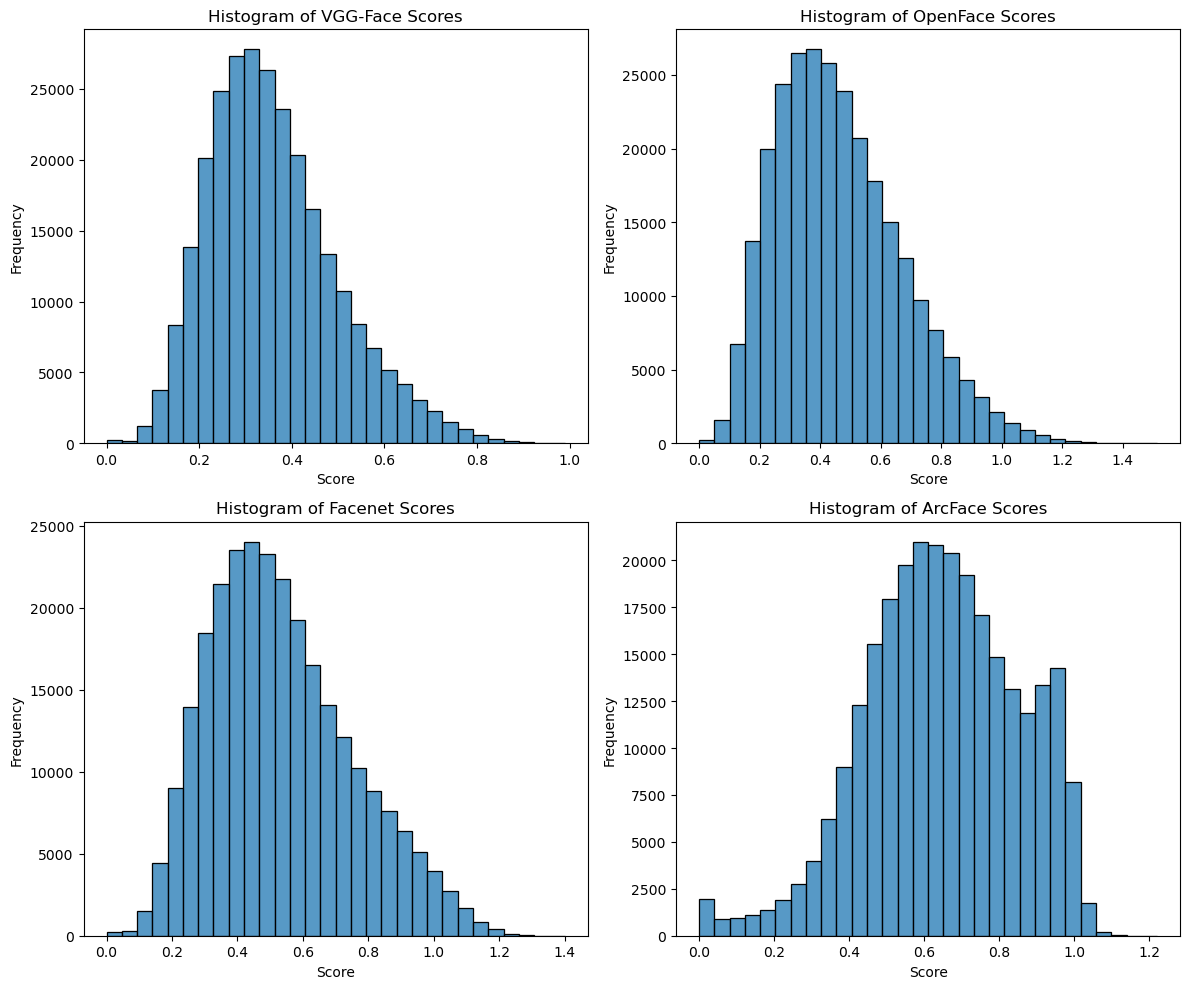

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

adf = pd.read_csv('./AEM_scores.csv')  # Replace 'your_file.csv' with your actual file path

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted the figure size for better layout

# Histogram for VGG-Face
sns.histplot(adf['VGG-Face'], bins=30, edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('Histogram of VGG-Face Scores')
axs[0, 0].set_xlabel('Score')
axs[0, 0].set_ylabel('Frequency')

# Histogram for OpenFace
sns.histplot(adf['OpenFace'], bins=30, edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title('Histogram of OpenFace Scores')
axs[0, 1].set_xlabel('Score')
axs[0, 1].set_ylabel('Frequency')

# Histogram for Facenet
sns.histplot(adf['Facenet'], bins=30, edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title('Histogram of Facenet Scores')
axs[1, 0].set_xlabel('Score')
axs[1, 0].set_ylabel('Frequency')

# Histogram for ArcFace
sns.histplot(adf['ArcFace'], bins=30, edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_title('Histogram of ArcFace Scores')
axs[1, 1].set_xlabel('Score')
axs[1, 1].set_ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()


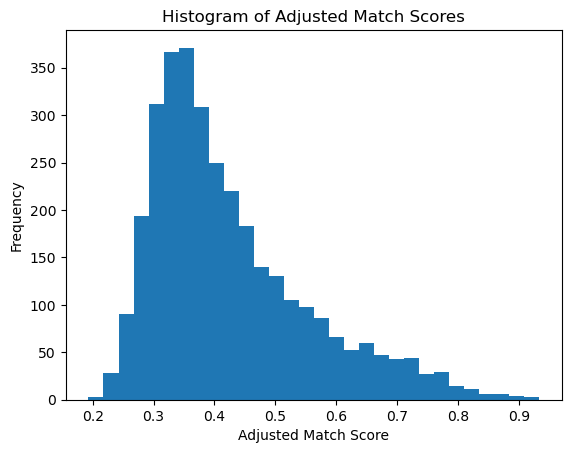

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('./quality_scores.csv')
# Histogram for adjusted match scores
data['Quality_Score'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()



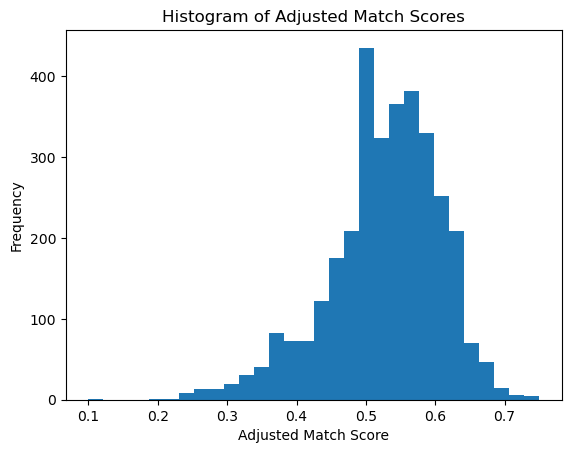

In [8]:
data['MS'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()

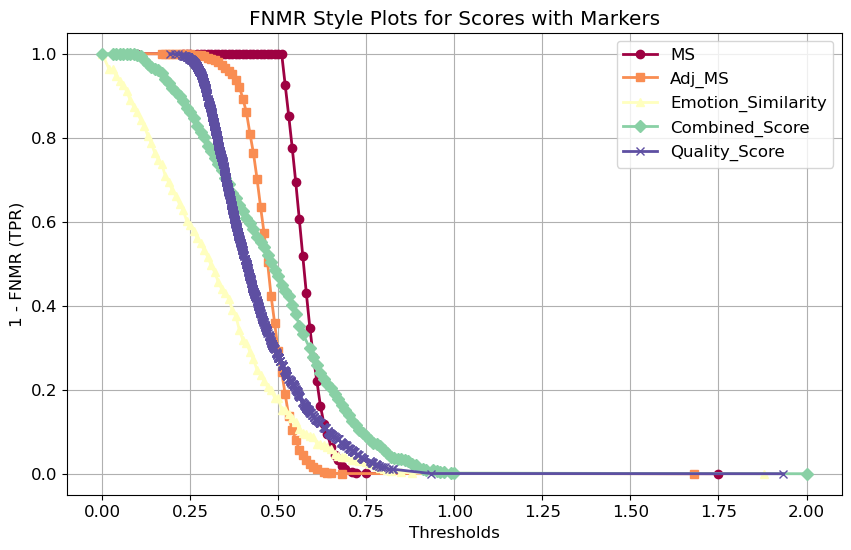

In [17]:
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# Define the plot function with markers
def plot_fnmr_style(scores, label, ax, color, marker):
    """
    Plot FNMR style (1 - FNMR) with markers for different thresholds for a given score.
    """
    fpr, tpr, thresholds = roc_curve(data['Label'], scores)
    fnmr_style = tpr  # FNMR style is just the TPR for the flipped curve
    ax.plot(thresholds, fnmr_style, label=label, color=color, marker=marker, linestyle='-', markersize=6, linewidth=2)

# Define score labels and corresponding markers
score_labels = ['MS', 'Adj_MS', 'Emotion_Similarity', 'Combined_Score', 'Quality_Score']
markers = ['o', 's', '^', 'D', 'x']  # You can choose different markers as per your preference
colormap = plt.cm.get_cmap('Spectral', len(score_labels))

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the FNMR style curves for each score
for i, label in enumerate(score_labels):
    plot_fnmr_style(data[label], label, ax, colormap(i), markers[i])

# Customize the plot
ax.set_title('FNMR Style Plots for Scores with Markers')
ax.set_xlabel('Thresholds')
ax.set_ylabel('1 - FNMR (TPR)')
ax.grid(True)
ax.legend(loc='best')

# Display the plot
plt.show()


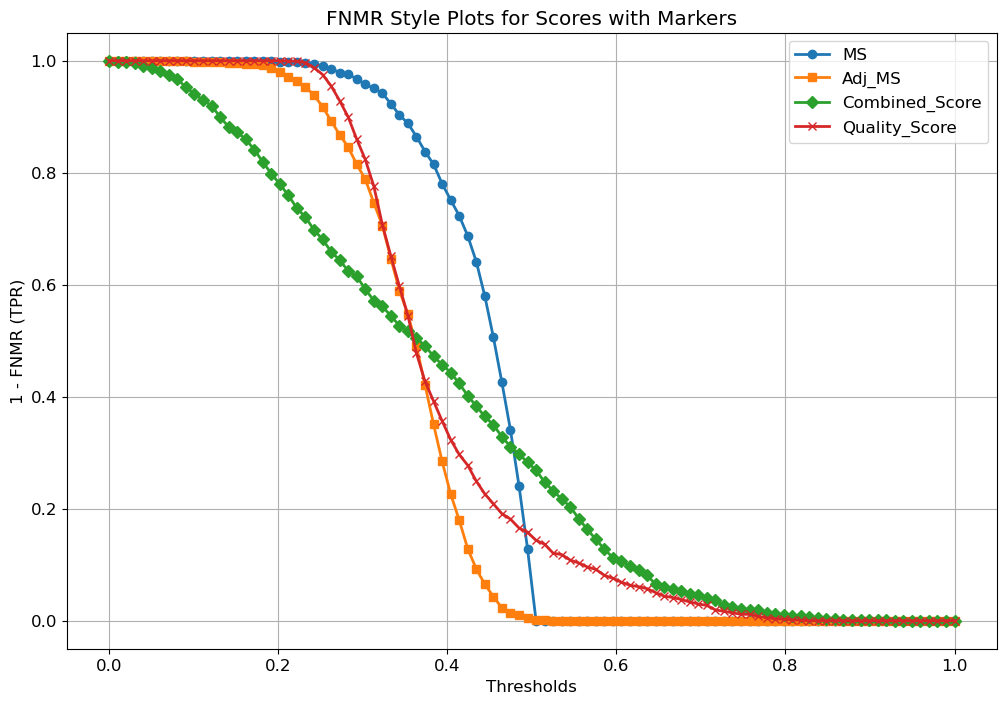

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_csv('AEM_scores.csv')  # Replace with the path to your CSV file

plt.rcParams.update({'font.size': 12})

# Define score labels and corresponding markers
score_labels = ['MS', 'Adj_MS', 'Combined_Score', 'Quality_Score']
markers = ['o', 's', 'D', 'x']  # You can choose different markers as per your preference
colormap = plt.cm.get_cmap('Spectral', len(score_labels))

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

for i, label in enumerate(score_labels):
    # Define thresholds
    thresholds = np.linspace(0, 1, 100)  # Assuming the scores are normalized between 0 and 1
    
    # Calculate FNMR for various thresholds
    fnmr_values = []
    for threshold in thresholds:
        fnmr = data[(data[label] > threshold) & (data['Label'] == 0)].shape[0] / max(data[data['Label'] == 0].shape[0], 1)
        fnmr_values.append(fnmr)
    
    # Plot the FNMR curve for each score
    marker_style = markers[i % len(markers)]
    ax.plot(thresholds, fnmr_values, label=label, marker=marker_style, markersize=6, linewidth=2)

# Customize the plot
ax.set_title('FNMR Style Plots for Scores with Markers')
ax.set_xlabel('Thresholds')
ax.set_ylabel('1 - FNMR (TPR)')
ax.grid(True)
ax.legend(loc='best')

# Display the plot
plt.show()


In [28]:
df1 = pd.read_csv('test.csv')
df2 = pd.read_csv('quality_scores.csv')

combined_df = pd.merge(df1, df2, on='Image', how='inner')



In [29]:
combined_df

,Image,MS_x,Adj_MS_x,Emotion_Similarity_x,label,qs_sdd,MS_y,Adj_MS_y,Emotion_Similarity_y,Label,Combined_Score,Quality_Score
0,11815_AnjelicaHuston_34_f.jpg,0.61,0.52,0.03,1,40.555653,0.61,0.52,0.03,1,0.18,0.446034
1,8552_CliffRobertson_37_m.jpg,0.50,0.46,0.54,0,64.601830,0.50,0.46,0.54,0,0.69,0.465930
2,8732_RichardAttenborough_32_m.jpg,0.45,0.33,0.06,0,40.500870,0.45,0.33,0.06,0,0.15,0.285675
3,13697_NormaShearer_37_f.jpg,0.59,0.41,0.00,1,34.227032,0.59,0.41,0.00,1,0.11,0.369025
4,11218_PiaLindstrom_22_f.jpg,0.39,0.31,0.80,0,35.153748,0.39,0.31,0.80,0,0.84,0.374468
...,...,...,...,...,...,...,...,...,...,...,...,...
3293,13447_DanielleDarrieux_86_f.jpg,0.48,0.47,0.41,0,46.728355,0.48,0.47,0.41,0,0.57,0.678951
3294,3036_BillNighy_32_m.jpg,0.47,0.42,0.23,0,36.216442,0.47,0.42,0.23,0,0.38,0.398602
3295,7008_ChristopherWalken_46_m.jpg,0.63,0.52,0.17,1,35.046604,0.63,0.52,0.17,1,0.36,0.296469
3296,2350_AbeVigoda_83_m.jpg,0.65,0.62,0.29,1,51.147572,0.65,0.62,0.29,1,0.51,0.290910


In [30]:
combined_df['qs_sdd'] = (combined_df['qs_sdd']/100).round(2)

In [31]:
combined_df

,Image,MS_x,Adj_MS_x,Emotion_Similarity_x,label,qs_sdd,MS_y,Adj_MS_y,Emotion_Similarity_y,Label,Combined_Score,Quality_Score
0,11815_AnjelicaHuston_34_f.jpg,0.61,0.52,0.03,1,0.41,0.61,0.52,0.03,1,0.18,0.446034
1,8552_CliffRobertson_37_m.jpg,0.50,0.46,0.54,0,0.65,0.50,0.46,0.54,0,0.69,0.465930
2,8732_RichardAttenborough_32_m.jpg,0.45,0.33,0.06,0,0.41,0.45,0.33,0.06,0,0.15,0.285675
3,13697_NormaShearer_37_f.jpg,0.59,0.41,0.00,1,0.34,0.59,0.41,0.00,1,0.11,0.369025
4,11218_PiaLindstrom_22_f.jpg,0.39,0.31,0.80,0,0.35,0.39,0.31,0.80,0,0.84,0.374468
...,...,...,...,...,...,...,...,...,...,...,...,...
3293,13447_DanielleDarrieux_86_f.jpg,0.48,0.47,0.41,0,0.47,0.48,0.47,0.41,0,0.57,0.678951
3294,3036_BillNighy_32_m.jpg,0.47,0.42,0.23,0,0.36,0.47,0.42,0.23,0,0.38,0.398602
3295,7008_ChristopherWalken_46_m.jpg,0.63,0.52,0.17,1,0.35,0.63,0.52,0.17,1,0.36,0.296469
3296,2350_AbeVigoda_83_m.jpg,0.65,0.62,0.29,1,0.51,0.65,0.62,0.29,1,0.51,0.290910


In [32]:
combined_df['Quality_Score'] = combined_df['Quality_Score'].round(2)

In [35]:
combined_df.drop(columns=['MS_x','Adj_MS_x','Emotion_Similarity_x'], inplace=True)

In [36]:
combined_df.to_csv('result.csv', header=True, index=False)

In [37]:
combined_df.columns

Index(['Image', 'label', 'qs_sdd', 'MS_y', 'Adj_MS_y', 'Emotion_Similarity_y',
       'Label', 'Combined_Score', 'Quality_Score'],
      dtype='object')

# FNMR CURVES

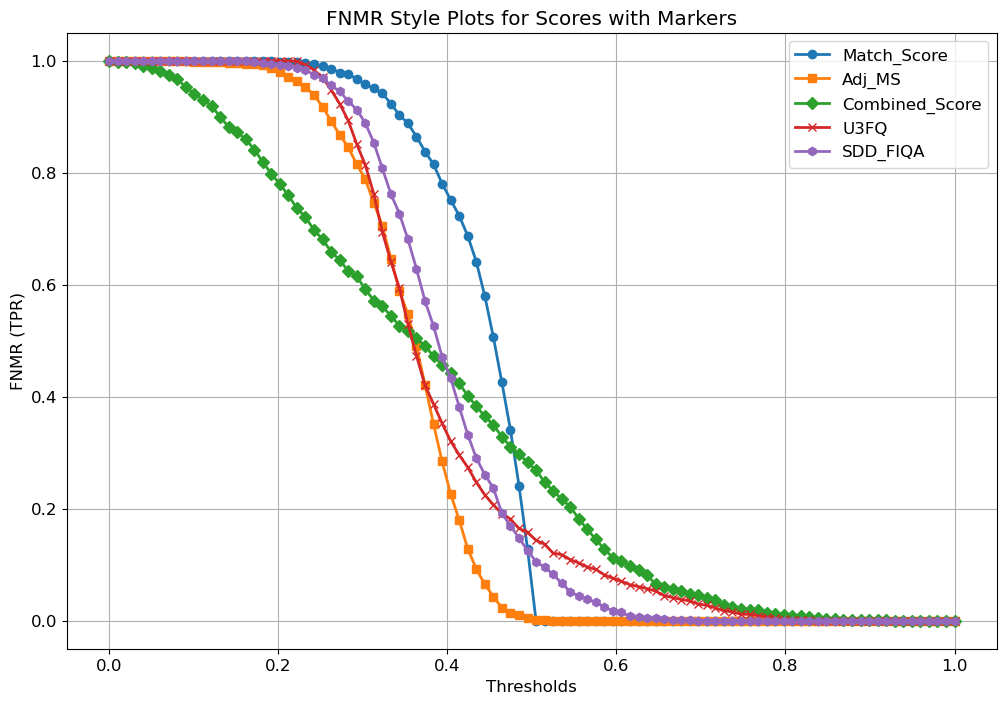

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('result.csv')  # Replace with the path to your CSV file

plt.rcParams.update({'font.size': 12})

# Define score labels and corresponding markers
score_labels = ['Match_Score', 'Adj_MS', 'Combined_Score', 'U3FQ', 'SDD_FIQA']
markers = ['o', 's', 'D', 'x', 'h']  # You can choose different markers as per your preference
colormap = plt.cm.get_cmap('Spectral', len(score_labels))

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

for i, label in enumerate(score_labels):
    # Define thresholds
    thresholds = np.linspace(0, 1, 100)  # Assuming the scores are normalized between 0 and 1
    
    # Calculate FNMR for various thresholds
    fnmr_values = []
    for threshold in thresholds:
        fnmr = data[(data[label] > threshold) & (data['Label'] == 0)].shape[0] / max(data[data['Label'] == 0].shape[0], 1)
        fnmr_values.append(fnmr)
    
    # Plot the FNMR curve for each score
    marker_style = markers[i % len(markers)]
    ax.plot(thresholds, fnmr_values, label=label, marker=marker_style, markersize=6, linewidth=2)

# Customize the plot
ax.set_title('FNMR Style Plots for Scores with Markers')
ax.set_xlabel('Thresholds')
ax.set_ylabel('FNMR (TPR)')
ax.grid(True)
ax.legend(loc='best')

# Display the plot
plt.show()


In [15]:
import pandas as pd
from sklearn.metrics import roc_auc_score

df = pd.read_csv('quality_scores.csv')

auc_score = roc_auc_score(df['Label'], df['Quality_Score'])
auc_score

0.6165967075423472

In [12]:
df.columns

Index(['Image', 'MS', 'Adj_MS', 'Emotion_Similarity', 'Label',
       'Combined_Score', 'Quality_Score'],
      dtype='object')

# CODE TO PLOT CURVES

In [34]:
df = pd.read_csv('./Arc56Lab_Qscore.csv')
df.columns

Index(['Image', 'MS', 'BCE_Qscore'], dtype='object')

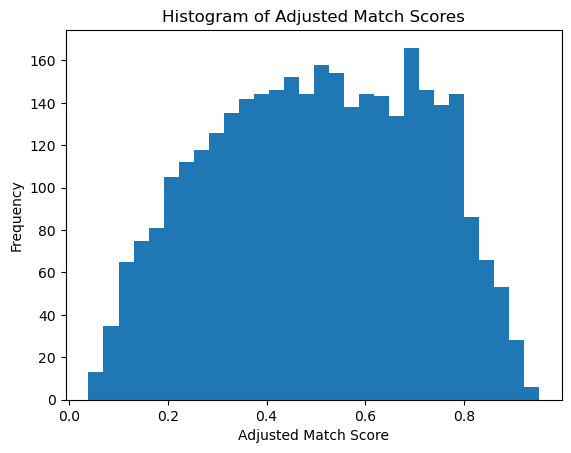

In [35]:
df['BCE_Qscore'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()

In [36]:
df = pd.read_csv('./Adience_Qscore.csv')
df.columns

Index(['Image', 'MS', 'BCE_Qscore'], dtype='object')

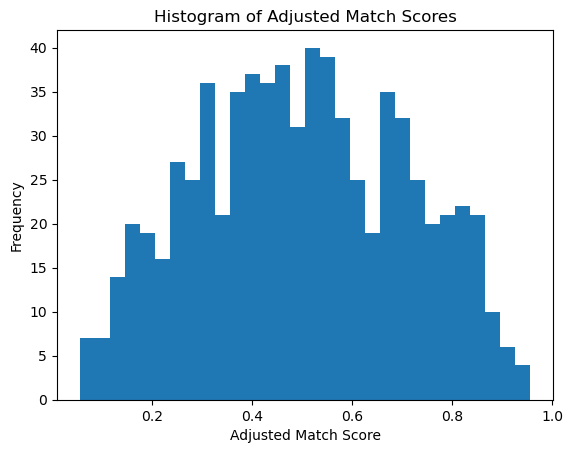

In [37]:
df['BCE_Qscore'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()

In [38]:
df = pd.read_csv('./lfw_Qscore.csv')
df.columns

Index(['Image', 'MS', 'BCE_Qscore'], dtype='object')

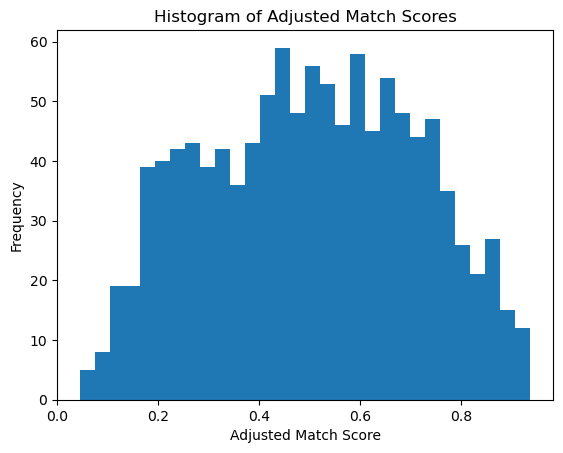

In [39]:
df['BCE_Qscore'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()

In [44]:
df = pd.read_csv('./Med_Qscore.csv')
df.columns

Index(['Image', 'MS', 'BCE_Qscore'], dtype='object')

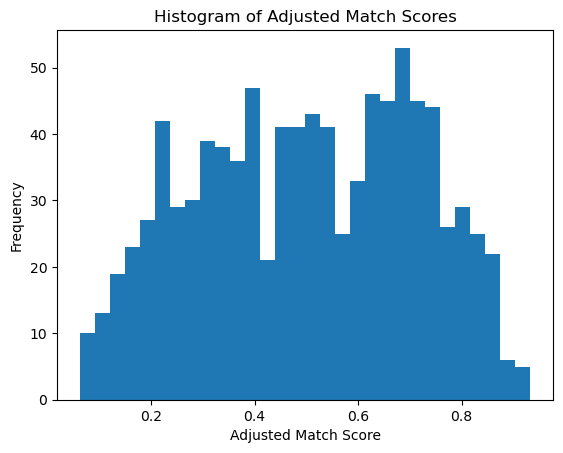

In [46]:
df['BCE_Qscore'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()

In [73]:
df = pd.read_csv('./MED/FMed_Qscore.csv')
df.columns

Index(['Image', 'MS', 'Qscore'], dtype='object')

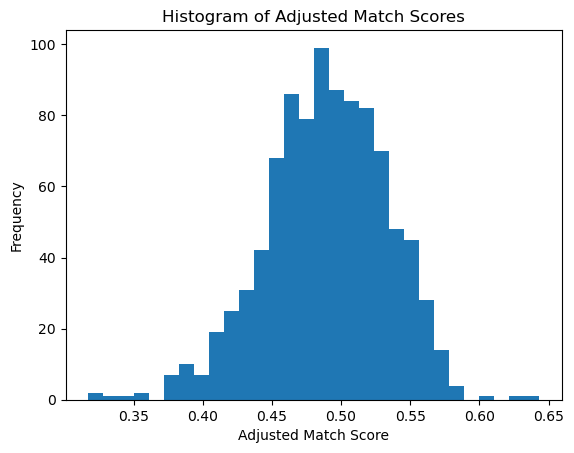

In [74]:
df['Qscore'].plot(kind='hist', bins=30, title='Histogram of Adjusted Match Scores')
plt.xlabel('Adjusted Match Score')
plt.ylabel('Frequency')
plt.show()

In [75]:
df['label'] = 0

df['label'] = df['Qscore'].apply(lambda x: 1 if x > 0.4 else 0)

# Code To calculate AOC values at threshold like 1e^-2 and 1e^-3

In [234]:
df = pd.read_csv('./FAgeDB_Qscore.csv')

In [225]:
def calculate_fmr(threshold, match_scores, non_match_scores):
    """
    Calculate the False Match Rate (FMR) at a given threshold.
    
    :param threshold: The threshold value to determine matches.
    :param match_scores: Array or list of match scores.
    :param non_match_scores: Array or list of non-match scores.
    :return: FMR value.
    """
    # Count the number of non-match scores that are incorrectly classified as matches
    false_matches = np.sum(non_match_scores > threshold)
    
    # Calculate FMR
    fmr = false_matches / len(non_match_scores) if len(non_match_scores) > 0 else 0
    
    return fmr


Area Over Curve (AOC): 0.753439066719843
1.0 1.0


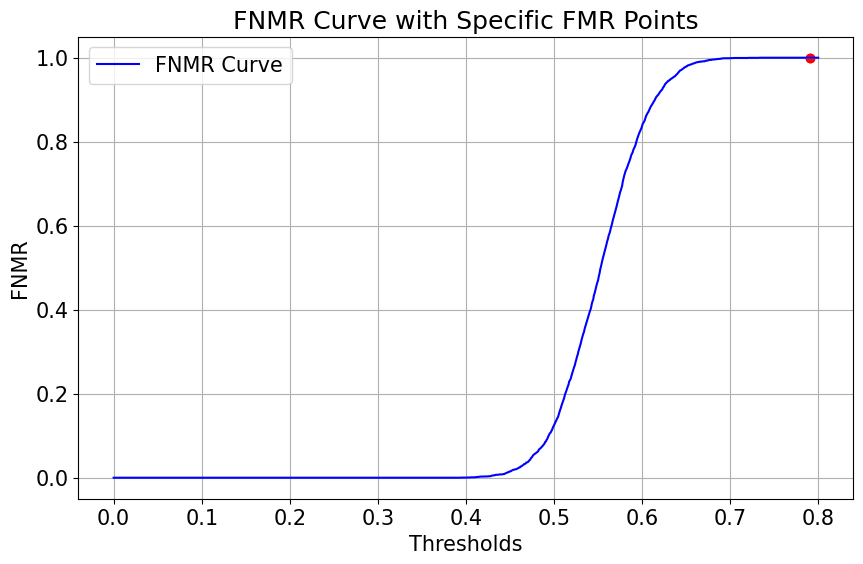

In [235]:
import pandas as pd
import numpy as np
from scipy.integrate import simps

# Load your CSV data
# df = pd.read_csv('path_to_your_csv.csv')

# Set a range of quality score thresholds
thresholds = np.linspace(0, 0.8, 1000)

# Calculate FNMR for each threshold
fnmr = []
for threshold in thresholds:
    # Counting the number of images below the threshold (considered as non-matches)
    non_matches = df[df['Qscore'] < threshold]['MS']
    # FNMR is the proportion of non-matches
    fnmr_value = non_matches.count() / df['MS'].count() if df['MS'].count() > 0 else 0
    fnmr.append(fnmr_value)

# Numerical integration of FNMR
area_under_curve = simps(fnmr, dx=thresholds[1] - thresholds[0])

# Calculate AOC
aoc = 1 - area_under_curve

print(f"Area Over Curve (AOC): {aoc}")

match_scores = df[df['Qscore'] >= 0.5]['MS']
non_match_scores = df[df['Qscore'] < 0.5]['MS']

fmr = [calculate_fmr(threshold, match_scores, non_match_scores) for threshold in thresholds]

# Find thresholds for specific FMR levels
threshold_for_1e_2 = thresholds[np.argmin(np.abs(np.array(fmr) - 1e-2))]
threshold_for_1e_3 = thresholds[np.argmin(np.abs(np.array(fmr) - 1e-3))]

# Find nearest indices in the FNMR array
index_1e_2 = np.argmin(np.abs(thresholds - threshold_for_1e_2))
index_1e_3 = np.argmin(np.abs(thresholds - threshold_for_1e_3))

# Calculate FNMR at these indices
fnmr_at_1e_2 = fnmr[index_1e_2]
fnmr_at_1e_3 = fnmr[index_1e_3]

print(fnmr_at_1e_2, fnmr_at_1e_3)

# Plot FNMR curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fnmr, label='FNMR Curve', color='blue')
plt.scatter([threshold_for_1e_2, threshold_for_1e_3], [fnmr_at_1e_2, fnmr_at_1e_3], color='red')  # Marking specific points
plt.xlabel('Thresholds')
plt.ylabel('FNMR')
plt.title('FNMR Curve with Specific FMR Points')
plt.legend()
plt.grid(True)
plt.show()


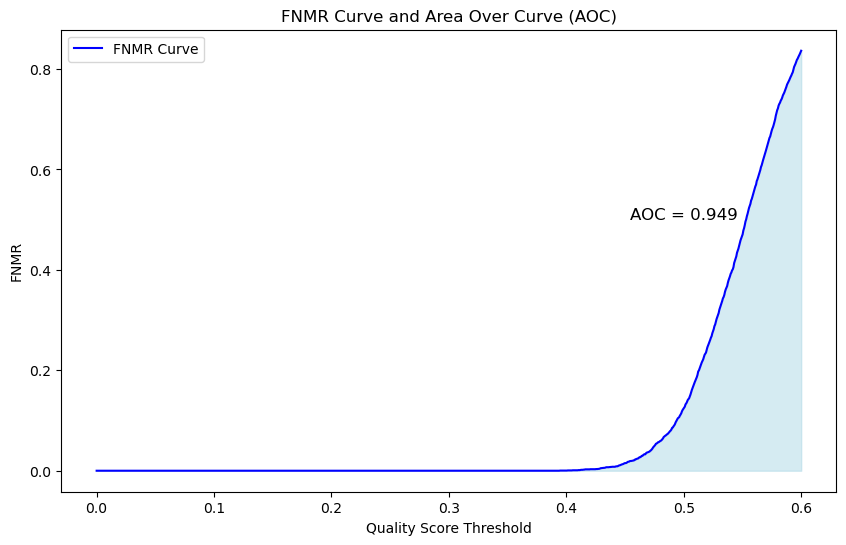

In [108]:
import matplotlib.pyplot as plt

# [Previous code for calculating fnmr and aoc]

# Plotting FNMR vs. Quality Score Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fnmr, label='FNMR Curve', color='blue')

# Highlighting the Area Under the FNMR Curve
plt.fill_between(thresholds, fnmr, color='lightblue', alpha=0.5)

# Display AOC Value on the plot
plt.text(0.5, 0.5, f'AOC = {aoc:.3f}', fontsize=12, ha='center')

# Adding labels and title for clarity
plt.xlabel('Quality Score Threshold')
plt.ylabel('FNMR')
plt.title('FNMR Curve and Area Over Curve (AOC)')
plt.legend()

# Show the plot
plt.show()


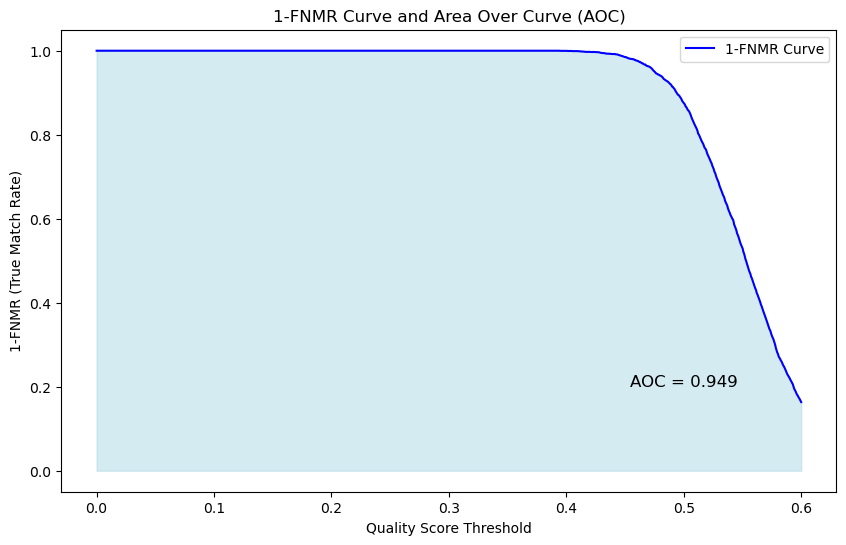

In [110]:
import matplotlib.pyplot as plt

# [Previous code for loading data and setting thresholds]

# Calculate 1-FNMR for each threshold
one_minus_fnmr = []
for threshold in thresholds:
    non_matches = df[df['Qscore'] < threshold]['MS']
    fnmr_value = non_matches.count() / df['MS'].count() if df['MS'].count() > 0 else 0
    one_minus_fnmr.append(1 - fnmr_value)  # Storing 1-FNMR

# Numerical integration of FNMR remains the same as before for AOC calculation

# Plotting 1-FNMR vs. Quality Score Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, one_minus_fnmr, label='1-FNMR Curve', color='blue')

# Highlighting the Area (Representing AOC)
plt.fill_between(thresholds, one_minus_fnmr, color='lightblue', alpha=0.5)

# Display AOC Value on the plot
plt.text(0.5, 0.2, f'AOC = {aoc:.3f}', fontsize=12, ha='center')

# Adding labels and title for clarity
plt.xlabel('Quality Score Threshold')
plt.ylabel('1-FNMR (True Match Rate)')
plt.title('1-FNMR Curve and Area Over Curve (AOC)')
plt.legend()

# Show the plot
plt.show()


In [117]:
df = pd.read_csv('./Med_Qscore.csv')

# CURVES INTERSECTION FOR FNMR AND FMR

In [153]:
import pandas as pd
import numpy as np
from scipy.integrate import simps

# Let's assume you label a match if Match Score is above a certain threshold. This threshold needs to be defined.
# For simplicity, let's consider a range of potential match score thresholds
thresholds = np.linspace(0, 1, 1000)  # Adjust according to your data range

# Initialize lists to store FMR and FNMR values
fmr_values = []
fnmr_values = []

# Assuming that a higher Match Score indicates a better match
for threshold in thresholds:
    # FMR: Proportion of non-matches (low Quality Score) incorrectly classified as matches
    # Define a criterion for non-matches based on Quality Score (e.g., Qscore < some_value)
    fmr = len(df[(df['MS'] > threshold) & (df['Qscore'] < 0.45)]) / len(df[df['Qscore'] < 0.45])

    # FNMR: Proportion of actual matches (high Quality Score) incorrectly classified as non-matches
    fnmr = len(df[(df['MS'] <= threshold) & (df['Qscore'] >= 0.65)]) / len(df[df['Qscore'] >= 0.65])

    fmr_values.append(fmr)
    fnmr_values.append(fnmr)

# Convert to numpy arrays for efficient processing
fmr_values = np.array(fmr_values)
fnmr_values = np.array(fnmr_values)

# Find the thresholds for FMR = 1e-2 and 1e-3
threshold_for_1e_2 = thresholds[np.argmin(np.abs(fmr_values - 1e-1))]
threshold_for_1e_3 = thresholds[np.argmin(np.abs(fmr_values - 1e-3))]

# Filter FNMR values for the range between these two thresholds
fnmr_in_range = fnmr_values[(thresholds >= threshold_for_1e_3) & (thresholds <= threshold_for_1e_2)]

# [Previous code for calculating thresholds and fnmr_values]

# Ensure that the array is not empty before proceeding
if len(fnmr_in_range) > 0:
    aoc_for_range = simps(fnmr_in_range, dx=thresholds[1] - thresholds[0])
    print(f"AOC between FMR = 1e-3 and FMR = 1e-2: {aoc_for_range}")
else:
    print("No data points fall within the specified FMR range.")


# # Calculate AOC for the specific range
# # aoc_for_range = simps(fnmr_in_range, dx=thresholds[1] - thresholds[0])

# # Print the AOC value for the specified FMR range
# print(f"AOC between FMR = 1e-3 and FMR = 1e-2: {aoc_for_range}")


No data points fall within the specified FMR range.


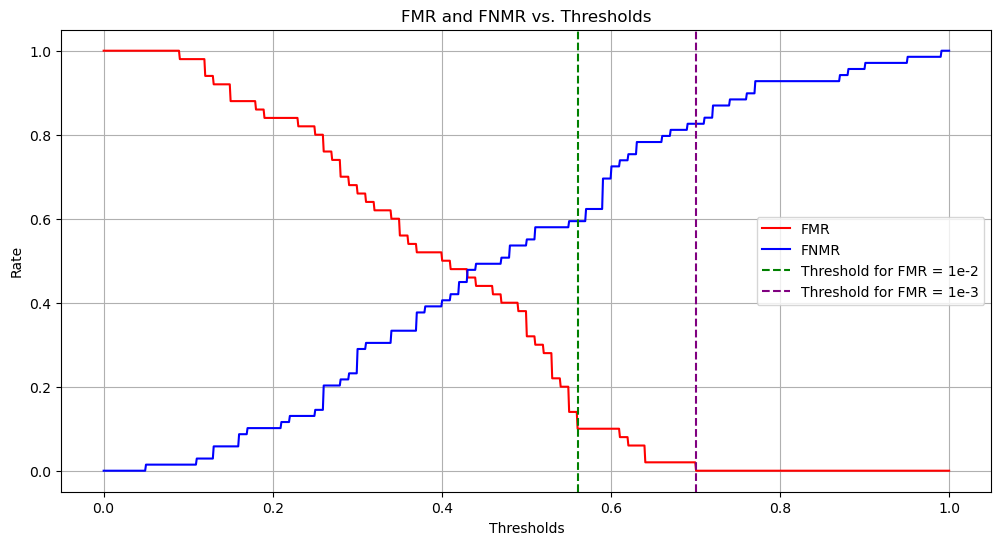

In [154]:
import matplotlib.pyplot as plt

# [Previous code for calculating FMR and FNMR]

# Plot FMR and FNMR
plt.figure(figsize=(12, 6))
plt.plot(thresholds, fmr_values, label='FMR', color='red')
plt.plot(thresholds, fnmr_values, label='FNMR', color='blue')
plt.axvline(x=threshold_for_1e_2, color='green', linestyle='--', label='Threshold for FMR = 1e-2')
plt.axvline(x=threshold_for_1e_3, color='purple', linestyle='--', label='Threshold for FMR = 1e-3')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.title('FMR and FNMR vs. Thresholds')
plt.legend()
plt.grid(True)
plt.show()
